# Assignment 4

## Part 1 Questions

1. You are provided with the following URL: [http://eecs.qmul.ac.uk/~emmanouilb/income_table.html](http://eecs.qmul.ac.uk/~emmanouilb/income_table.html). This webpage includes a table on individuals' income and shopping habits - the same that was used in the Week 3 lab.
  1. Inspect the HTML code of the above URL, and provide a short report on the various tags present in the code. What is the function of each unique tag present in the HTML code?
  2. Using Beautiful Soup, scrape the table and convert it into a pandas dataframe. Perform data cleaning when necessary to remove extra characters (no need to handle missing values). In the report include the code that was used to scrape and convert the table and provide evidence that the table has been successfully scraped and converted (e.g. by displaying the contents of the dataframe).
  
2. The list of the various MSc programmes offered by the School of EECS is provided at the following URL: [http://eecs.qmul.ac.uk/postgraduate/programmes/](http://eecs.qmul.ac.uk/postgraduate/programmes/). Perform web scraping on the table present in the above URL and convert it into a pandas dataframe that would include one row for each programme of study as shown in the webpage. The dataframe should include the following 5 columns: name of postgraduate degree programme (e.g. Advanced Electronic and Electrical Engineering), programme code for part-time study (e.g. H60C), programme code for full-time study (e.g. H60A), URL for part-time study programme details, and URL for full-time study programme details. Perform data cleaning to remove unecessary characters when needed. In the report include the code that was used to scrape, convert and clean the table and provide evidence that the table has been successfully scraped (e.g. by displaying the contents of the dataframe).

3. Consider the graph in the figure below as displaying the links for a group of 5 webpages.
  1. Which of the 5 nodes would you consider hubs and which would you consider authorities?
  2. Assume that this graph is to be used as input to the PageRank algorithm. Add transitions with a uniform probability distribution in the case of dead-end nodes (do not consider cases of dead-end components). Then, calculate the transition probabilities $p_{ji}$ for all 5 nodes in the graph (where $i$ and $j$ take values between 1 to 5).
  3. Using the modified graph of question 3B, derive the PageRank $\pi(i)$ for all nodes, where $i=\{1,...,5\}$ corresponds to the node index. Assume that the teleportation probability is set to $\alpha$.

### Question 1A

The various tags and functions present within the HTML code are:
* < html > tag represents the start of a html document
* < head > contains metadata information for the HTML document (visible under page elements - it is empty for this page, but included here for completeness)
* < body > defines the document's body and contains all the contents of the HTML document, including headings, paragraphs and tables
* < p > indicates a paragraph
* < h1 > defines a HTML heading; typically there is only one per page to represent the main heading of the entire page
* < table > defines a HTML table, consisting of various elements decribed below
* < thead > groups the header content within a table, used in conjunction with < tbody > which groups the body content in a table
* < tr > defines a row in a table, < th > defines a table header, and < td > defines a table cell

The < / [tag] > are used to denote the end of these tags

### Question 1B

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from urllib.request import urlopen
from bs4 import BeautifulSoup

url = "http://eecs.qmul.ac.uk/~emmanouilb/income_table.html"
html = urlopen(url)

soup = BeautifulSoup(html, 'lxml')

# Create an empty list where the table header will be stored
header_list = []

# Find the 'th' html tags which denote table header
col_labels = soup.find_all('th')
col_str = str(col_labels)

# extract the text without HTML tags
cleantext_header = BeautifulSoup(col_str, "lxml").get_text()

# Add the clean table header to the list
header_list.append(cleantext_header)


rows = soup.find_all('tr') # the 'tr' tag in html denotes a table row

# Create an empty list where the table will be stored
table_list = []

# For every row in the table, find each cell element and add it to the list
for row in rows:
    row_td = row.find_all('td')
    row_cells = str(row_td)
    # extract the text without HTML tags
    row_cleantext = BeautifulSoup(row_cells, "lxml").get_text()
    # Add the clean table row to the list
    table_list.append(row_cleantext)
    
# Create the dataframes for header and table lists
df_header = pd.DataFrame(header_list)
df_header2 = df_header[0].str.split(',', expand=True)

df_table = pd.DataFrame(table_list)
df_table2 = df_table[0].str.split(',', expand=True)

# We remove uneccessary characters from the header
df_header2[0] = df_header2[0].str.strip('[')
df_header2[3] = df_header2[3].str.strip(']')


# Remove uneccesary characters from the table rows
df_table2[0] = df_table2[0].str.strip('[')
df_table2[3] = df_table2[3].str.strip(']')

# We concatenate the two dataframes
frames = [df_header2, df_table2]
df = pd.concat(frames)
# We assign the first row to be the dataframe header
df2 = df.rename(columns=df.iloc[0])
# We drop the replicated header from the first row of the dataframe
df3 = df2.drop(df2.index[0])

display(df3)

,Region,Age,Income,Online Shopper
1,India,49,86400,No
2,Brazil,32,57600,Yes
3,USA,35,64800,No
4,Brazil,43,73200,No
5,USA,45,,Yes
6,India,40,69600,Yes
7,Brazil,,62400,No
8,India,53,94800,Yes
9,USA,55,99600,No
10,India,42,80400,Yes


### Question 2

In [2]:
url = "http://eecs.qmul.ac.uk/postgraduate/programmes/"
html = urlopen(url)

soup = BeautifulSoup(html, 'lxml')

# Create an empty list where the table header will be stored
header_list = []

# Find the 'th' html tags which denote table header
col_labels = soup.find_all('th')
col_str = str(col_labels)
# extract the text without HTML tags
cleantext_header = BeautifulSoup(col_str, "lxml").get_text() 
# Add the clean table header to the list
header_list.append(cleantext_header)

rows = soup.find_all('tr') # the 'tr' tag in html denotes a table row

# Create an empty list where the table will be stored
table_list = []

# For every row in the table, find each cell element and add it to the list
for row in rows:
    row_td = row.find_all('td')
    row_cells = str(row_td)
    # extract the text without HTML tags
    row_cleantext = BeautifulSoup(row_cells, "lxml").get_text()
    # Add the clean table row to the list
    table_list.append(row_cleantext)
        
# Create the dataframes for header and table lists
df_header = pd.DataFrame(header_list)
df_header2 = df_header[0].str.split(',', expand=True)

# We remove uneccessary characters from the header
df_header2[0] = df_header2[0].str.strip('[')
df_header2[2] = df_header2[2].str.strip(']')

df_table = pd.DataFrame(table_list)
df_table2 = df_table[0].str.split(',', expand=True)
df_table2[0] = df_table2[0].str.strip('[')
df_table2[2] = df_table2[2].str.strip(']')

# We concatenate the two dataframes
frames = [df_header2, df_table2]
df = pd.concat(frames)
df
# We assign the first row to be the dataframe header
df2 = df.rename(columns=df.iloc[0])
# We drop the replicated header from the first row of the dataframe
df3 = df2.drop(df2.index[0]).reset_index(drop=True)
df3

# Find all course URLs
course_urls = []

for x in soup.findAll("td", style = "text-align: center;"):
    if x.a:
        course_urls.append(x.a.get('href'))
    else:
        course_urls.append('')

# Split the course urls into the respective part time and full time
course_urls_df = pd.DataFrame(course_urls)
course_urls_pt = course_urls_df.iloc[::2, :].rename(columns={0:'Part-time Study URL'}).reset_index(drop=True)
course_urls_ft = course_urls_df.iloc[1::2, :].rename(columns={0:'Full-time Study URL'}).reset_index(drop=True)

df4 = df3.join(course_urls_pt)
df5 = df4.join(course_urls_ft)

display(df5)

,Postgraduate degree programmes,Part-time(2 year),Full-time(1 year),Part-time Study URL,Full-time Study URL
0,Advanced Electronic and Electrical Engineering,H60C,H60A,https://www.qmul.ac.uk/postgraduate/taught/cou...,https://www.qmul.ac.uk/postgraduate/taught/cou...
1,Artificial Intelligence,I4U2,I4U1,https://www.qmul.ac.uk/postgraduate/taught/cou...,https://www.qmul.ac.uk/postgraduate/taught/cou...
2,Big Data Science,H6J6,H6J7,https://www.qmul.ac.uk/postgraduate/taught/cou...,https://www.qmul.ac.uk/postgraduate/taught/cou...
3,Computer Games,,I4U4,,https://www.qmul.ac.uk/postgraduate/taught/cou...
4,Computer Science,G4U2,G4U1,https://www.qmul.ac.uk/postgraduate/taught/cou...,https://www.qmul.ac.uk/postgraduate/taught/cou...
5,Computer Science by Research,G4Q2,G4Q1,https://www.qmul.ac.uk/postgraduate/taught/cou...,https://www.qmul.ac.uk/postgraduate/taught/cou...
6,Computing and Information Systems,G5U6,G5U5,https://www.qmul.ac.uk/postgraduate/taught/cou...,https://www.qmul.ac.uk/postgraduate/taught/cou...
7,Data Science and Artificial Intelligence by Co...,,I4U5,,https://www.qmul.ac.uk/postgraduate/taught/cou...
8,Electronic Engineering by Research,H6T6,H6T5,https://www.qmul.ac.uk/postgraduate/taught/cou...,https://www.qmul.ac.uk/postgraduate/taught/cou...
9,Internet of Things (Data),I1T2,I1T0,https://www.qmul.ac.uk/postgraduate/taught/cou...,https://www.qmul.ac.uk/postgraduate/taught/cou...


### Question 3A

An authority would be a page with many in-links, whereas a hub is a page with many out-links. The below table summarises the classification of nodes 1-5.

| Node | Number of In-links| Number of Out-links | Classification |
|:--:|:--:|:---:|:-----:|
|1  | 3 | 0 | Authority |
|2  | 3 | 0 | Authority |
|3  | 0 | 2 | Hub |
|4  | 0 | 2 | Hub |
|5  | 0 | 2 | Hub |


### Question 3B

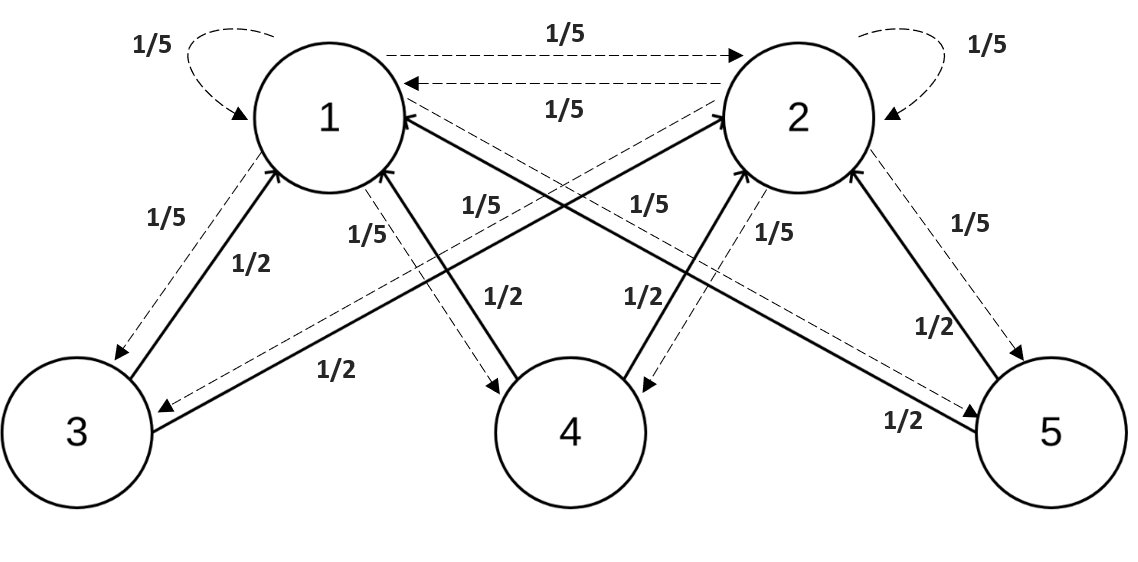

From the modified graph, we can see that the transition probabilities $p_{ji}$ are:

| Node | Transition Probability (to applicable nodes)
|:--:|:--:|
|1  | 0.2 (all nodes)|
|2  | 0.2 (all nodes)|
|3  | 0.5 (nodes 1 and 2)|
|4  | 0.5 (nodes 1 and 2)|
|5  | 0.5 (nodes 1 and 2)|

### Question 3C

To determine the page rank:
* Obtain page rank of all nodes directed to the node of interest
* Then divide the respective page ranks by the number of outgoing connections the node has
* Probability of teleportation into node $i$ is $a/n$
* Probability of transition into node $i$ is given by $(1-a)$

$\pi$(1) = $a$/5 + (1-$a$) $\cdot$ ($\pi$(1)/5 + $\pi$(2)/5 + $\pi$(3)/2 + $\pi$(4)/2 + $\pi$(5)/2)

$\pi$(2) = $a$/5 + (1-$a$) $\cdot$ ($\pi$(1)/5 + $\pi$(2)/5 + $\pi$(3)/2 + $\pi$(4)/2 + $\pi$(5)/2)

$\pi$(3) = $a$/5 + (1-$a$) $\cdot$ ($\pi$(1)/5 + $\pi$(2)/5)

$\pi$(4) = $a$/5 + (1-$a$) $\cdot$ ($\pi$(1)/5 + $\pi$(2)/5)

$\pi$(5) = $a$/5 + (1-$a$) $\cdot$ ($\pi$(1)/5 + $\pi$(2)/5)

## Part 2 Questions

1. Consider the following sentences related to data mining theory, and assume that each of the below sentences corresponds to a different document:
    * Data refers to characteristics that are collected through observation.
    * A dataset can be viewed as a collection of objects.
    * Data objects are described by a number of attributes.
    * An attribute is a characteristic or feature of an object.

  1. Construct and display the document-term matrix for the above documents. Remove all stop words (here consider as stop words: articles, prepositions, conjunctions, pronouns, and common verbs) and punctuation marks; convert any plural nouns/adjectives to their singular form; and convert verbs to the present tense and first person singular form, before you construct the matrix.
  2. Using the above constructed document-term matrix, calculate the inverse document frequency $\mathit{idf}(w)$ for all words $w$ you have identified from question 1(a).

2. Consider the following timeseries $y = \{0.1, 0.15, 0.2, 0.2, 0.3, 0.4, 0.25, 0.6, 0.5\}$. Perform timeseries binning using $k=3$ values per bin, and show the resulting timeseries after binning.



4. Using the daily births dataset from this lab tutorial, smooth the timeseries using trailing moving average smoothing and a window size that corresponds to one week; then replace any NaN values with zeros. Perform timeseries forecasting using the smoothed dataset in order to predict daily births for the first 5 days of 1960, using the models below. Show your forecasting results.
    * AR model with $p=2$
    * ARMA model with $p=2$ and $q=2$

5. Using a similar process used in section 1 of this lab notebook, perform document clustering using k-means on the following wikipedia articles: anomaly detection, cluster analysis, k-means clustering, data mining, data warehouse, association rule learning. As with section 1, use the elbow metric to find an appropriate number of clusters. Discuss and display the document clustering results.

### Question 1A

Removal of stop words:
* data characteristics collected observation.
* dataset collection objects.
* data objects number attributes.
* attribute characteristic feature object.

Removal of punctuation marks:
* data characteristics collected observation
* dataset collection objects
* data objects number attributes
* attribute characteristic feature object

Conversion of plural nouns/adjectives to singular form:
* data characteristic collected observation
* dataset collection object
* data object number attribute
* attribute characteristic feature object

Convert verbs to present tense and first person singular form:
* data characteristic collect observation
* dataset collection object
* data object number attribute
* attribute characteristic feature object

The document-term matrix is as follows:

| Document/Term | data| characteristic | collect | observation | dataset | collection | object | number | attribute | feature | 
|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|
|1   | 1  | 1  | 1  | 1  | 0  | 0  | 0  | 0  | 0  | 0 |
|2   | 0  | 0  | 0  | 0  | 1  | 1  | 1  | 0  | 0  | 0 |
|3   | 1  | 0  | 0  | 0  | 0  | 0  | 1  | 1  | 1  | 0 |
|4   | 0  | 1  | 0  | 0  | 0  | 0  | 1  | 0  | 1  | 1 |

### Question 1B

IDF is calculated for each word in the table below (rounded to 2 d.p.)
* We use the logarithm of the total number of documents (4), divided by the number of documents that contain the word (from the above table)

| Word | 4/w |  IDF [log(4/w)] |
|:--:|:--:|:--:|
| data | 4/2 = 2 | 0.3 |
| characteristic | 4/2 = 2  |0.3 |
| collect | 4/1 = 4  | 0.6  |
| observation | 4/1 = 4  | 0.6  |
| dataset | 4/1 = 4 | 0.6  |
| collection | 4/1 = 4 | 0.6  |
| object | 4/3 = 1.33 | 0.12 |
| number | 4/1 = 4 | 0.6  |
| attribute | 4/2 = 2  |0.3 |
| feature| 4/1 = 4 | 0.6  |

### Question 2

The resulting timeseries following binning is:

We require 3 bins, and there are 9 values in total, therefore we take the average of every 3 values

{((0.1 + 0.15 + 0.2) / 3), ((0.2 + 0.3 + 0.4) / 3), ((0.25 + 0.6 + 0.5) / 3)}

= {(0.45 / 3), (0.9 / 3), (1.35 /3)}

= {0.15, 0.3, 0.45}

### Question 3

Text(0.5, 1.0, '$|X|$ - magnitude of DFT')

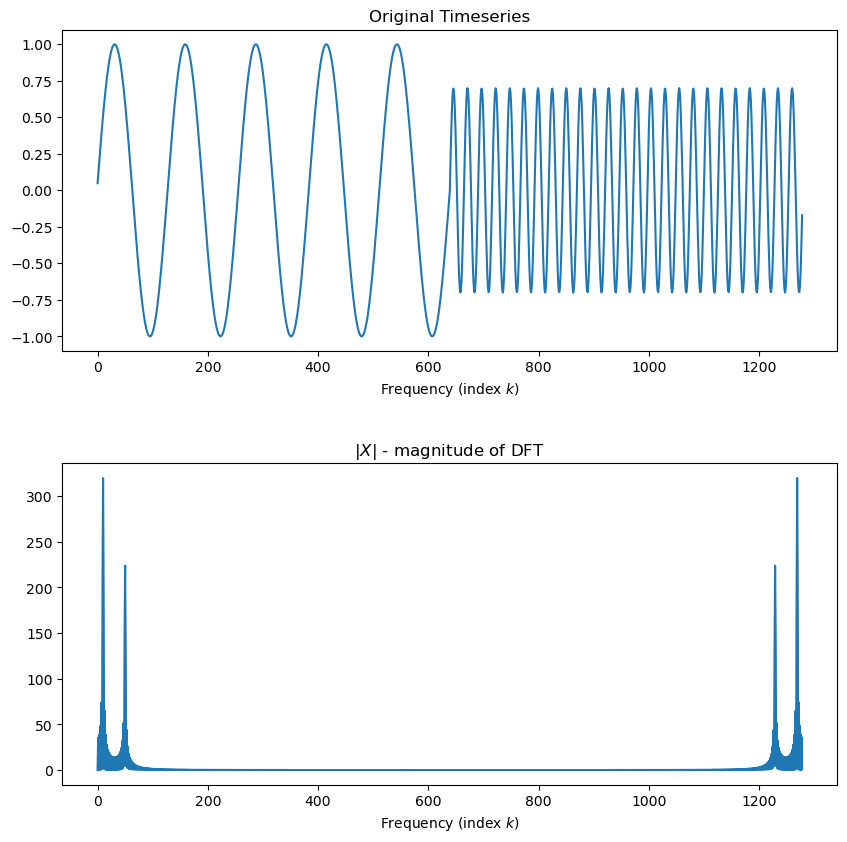

In [3]:
series = pd.read_csv('timeseries.csv')
series_array = np.array(series).flatten()

Xfft = np.fft.fft(series_array)

fig, (a1, a2) = plt.subplots(2, 1, figsize=(10, 10), dpi=100)
plt.subplots_adjust(hspace=0.35)

a1.plot(series_array)
a1.set_xlabel("Frequency (index $k$)")
a1.set_title("Original Timeseries")

a2.plot(np.abs(Xfft))
a2.set_xlabel("Frequency (index $k$)")
a2.set_title("$|X|$ - magnitude of DFT")

We can see that the DFT of the timeseries is symmetric, thus the upper half of the figure can be discarded for the analysis of the timeseries. By inspecting the lower half of the DFT, there are 2 peaks.

Therefore, there are 2 predominant frequency components in the time series. This is consistent with the plot of the original timeseries, which shows two distinct wave patterns.

### Question 4

In [4]:
from statsmodels.tsa.ar_model import AutoReg
series = pd.read_csv('births.csv', header=0, index_col=0)

# Perform trailing moving average smoothing
rolling = series.rolling(window=7)
rolling_mean = rolling.mean()

# Replacing NaN values with zeros
rolling_mean = rolling_mean.replace(np.nan, 0)

# Fit Autoregressive model with p = 2
model = AutoReg(rolling_mean, lags=2, old_names=False)
model_fit = model.fit()

# Make prediction
yhat = model_fit.predict(len(rolling_mean), len(rolling_mean)+4)
print("Predictions for daily births in the first 5 days of 1960 AR model with p=2: ")
print(yhat)

Predictions for daily births in the first 5 days of 1960 AR model with p=2: 
1960-01-01    45.380177
1960-01-02    44.960852
1960-01-03    44.590676
1960-01-04    44.271699
1960-01-05    43.997395
Freq: D, dtype: float64


C:\Users\Somil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Somil\anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:152: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and NumericIndex with a unit increment support extending. The index is set will contain the position relative to the data length.
  warnings.warn(


In [11]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARMA model with p=2, q=2
model = ARIMA(rolling_mean, order=(2, 0, 2))
model_fit = model.fit()

# Make prediction
yhat = model_fit.predict(len(rolling_mean), len(rolling_mean)+4)
print("Predictions for daily births in the first 5 days of 1960 ARMA model with p=2 and q=2: ")
print(yhat)

C:\Users\Somil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Somil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Somil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


Predictions for daily births in the first 5 days of 1960 ARMA model with p=2 and q=2: 
1960-01-01    45.810247
1960-01-02    45.818766
1960-01-03    45.728092
1960-01-04    45.564016
1960-01-05    45.347305
Freq: D, Name: predicted_mean, dtype: float64


### Question 5

In [6]:
import wikipedia

articles=['Anomaly detection','Cluster analysis','K-means clustering','Data mining','Data warehouse','Association rule learning']
wiki_lst=[]
title=[]

# Load wikipedia articles
for article in articles:
    print("loading content: ",article)
    wiki_lst.append(wikipedia.page(article,auto_suggest=False).content)
    title.append(article)

loading content:  Anomaly detection
loading content:  Cluster analysis
loading content:  K-means clustering
loading content:  Data mining
loading content:  Data warehouse
loading content:  Association rule learning


In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words={'english'})
X = vectorizer.fit_transform(wiki_lst)

print(X.shape)

(6, 3511)


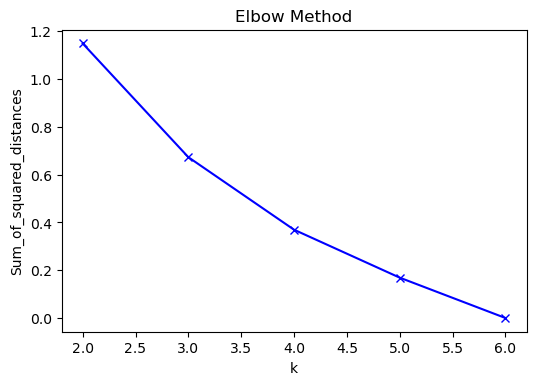

In [13]:
from sklearn.cluster import KMeans

Sum_of_squared_distances = []
K = range(2,7)

for k in K:
    km = KMeans(n_clusters=k, max_iter=200, n_init=10)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

plt.figure(dpi=100)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method')
plt.show()

From the above plot, we can see that the first small dent occurs at k=3, therefore we will cluster into 3 groups.

In [9]:
# Fit k-means model with k=3
true_k = 3
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200, n_init=10, random_state=2)
model.fit(X)

# Print list of documents and associated clusters
labels=model.labels_
wiki_cl=pd.DataFrame(list(zip(title,labels)),columns=['title','cluster'])
print("The document clustering results are: ")
print(wiki_cl.sort_values(by=['cluster']))

The document clustering results are: 
                       title  cluster
0          Anomaly detection        0
1           Cluster analysis        1
2         K-means clustering        1
5  Association rule learning        1
3                Data mining        2
4             Data warehouse        2


From the above clustering results, we can see the following groupings (we have used a random state to avoid changing of clusters on re-run):
* Cluster 0: "Anomaly detection" - this topic would not seem directly related to other clusters.
* Cluster 1: "Clustering analysis", "K-means clustering" and "Association rule learning"- these topics are similar, as they are all unsupervised methods.
* Cluster 2: "Data mining" and "Data warehouse" - both of these relate directly to the use of data and are similar.

Overall, the results of clustering seem plausible in that more similar topics have been grouped together.